In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import linear_model, tree
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import random
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from joblib import Parallel, delayed
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
df = pd.read_csv(r'C:\Users\vaish\Downloads\spotify analysis\dataset.csv')

In [3]:
print(f'number of duplicate rows: {df.duplicated().sum()}\nnumber of null values:\n{df.isna().sum()}')

number of duplicate rows: 0
number of null values:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [4]:
df.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], axis=1, inplace = True)

In [5]:
df.shape

(114000, 16)

In [6]:
df.head()

popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          73       230666     False         0.676  0.4610    1    -6.746   
1          55       149610     False         0.420  0.1660    1   -17.235   
2          57       210826     False         0.438  0.3590    0    -9.734   
3          71       201933     False         0.266  0.0596    0   -18.515   
4          82       198853     False         0.618  0.4430    2    -9.681   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.1430        0.0322          0.000001    0.3580    0.715   
1     1       0.0763        0.9240          0.000006    0.1010    0.267   
2     1       0.0557        0.2100          0.000000    0.1170    0.120   
3     1       0.0363        0.9050          0.000071    0.1320    0.143   
4     1       0.0526        0.4690          0.000000    0.0829    0.167   

     tempo  time_signature track_genre  
0   87.917               4    acoustic  
1   77.489               4    acoustic  
2   76.332               4    acoustic  
3  181.740               3    acoustic  
4  119.949               4    acoustic

In [7]:
df.describe()

popularity   duration_ms   danceability         energy  \
count  114000.000000  1.140000e+05  114000.000000  114000.000000   
mean       33.238535  2.280292e+05       0.566800       0.641383   
std        22.305078  1.072977e+05       0.173542       0.251529   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        5.309140      -8.258960       0.637553       0.084652   
std         3.559987       5.029337       0.480709       0.105732   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  114000.000000     114000.000000  114000.000000  114000.000000   
mean        0.314910          0.156050       0.213553       0.474068   
std         0.332523          0.309555       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.598000          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature  
count  114000.000000   114000.000000  
mean      122.147837        3.904035  
std        29.978197        0.432621  
min         0.000000        0.000000  
25%        99.218750        4.000000  
50%       122.017000        4.000000  
75%       140.071000        4.000000  
max       243.372000        5.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int64  
 1   duration_ms       114000 non-null  int64  
 2   explicit          114000 non-null  bool   
 3   danceability      114000 non-null  float64
 4   energy            114000 non-null  float64
 5   key               114000 non-null  int64  
 6   loudness          114000 non-null  float64
 7   mode              114000 non-null  int64  
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  liveness          114000 non-null  float64
 12  valence           114000 non-null  float64
 13  tempo             114000 non-null  float64
 14  time_signature    114000 non-null  int64  
 15  track_genre       114000 non-null  object 
dtypes: bool(1), float64(

In [9]:
print(f'number of duplicate rows: {df.duplicated().sum()}\nnumber of null values:\n{df.isna().sum()}')

number of duplicate rows: 7093
number of null values:
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [10]:
def labelencoder(df):
    for c in df.columns:
        if df[c].dtype=='object': 
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

In [11]:
df = labelencoder(df)
df.head()

popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          73       230666     False         0.676  0.4610    1    -6.746   
1          55       149610     False         0.420  0.1660    1   -17.235   
2          57       210826     False         0.438  0.3590    0    -9.734   
3          71       201933     False         0.266  0.0596    0   -18.515   
4          82       198853     False         0.618  0.4430    2    -9.681   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.1430        0.0322          0.000001    0.3580    0.715   
1     1       0.0763        0.9240          0.000006    0.1010    0.267   
2     1       0.0557        0.2100          0.000000    0.1170    0.120   
3     1       0.0363        0.9050          0.000071    0.1320    0.143   
4     1       0.0526        0.4690          0.000000    0.0829    0.167   

     tempo  time_signature  track_genre  
0   87.917               4            0  
1   77.489               4            0  
2   76.332               4            0  
3  181.740               3            0  
4  119.949               4            0

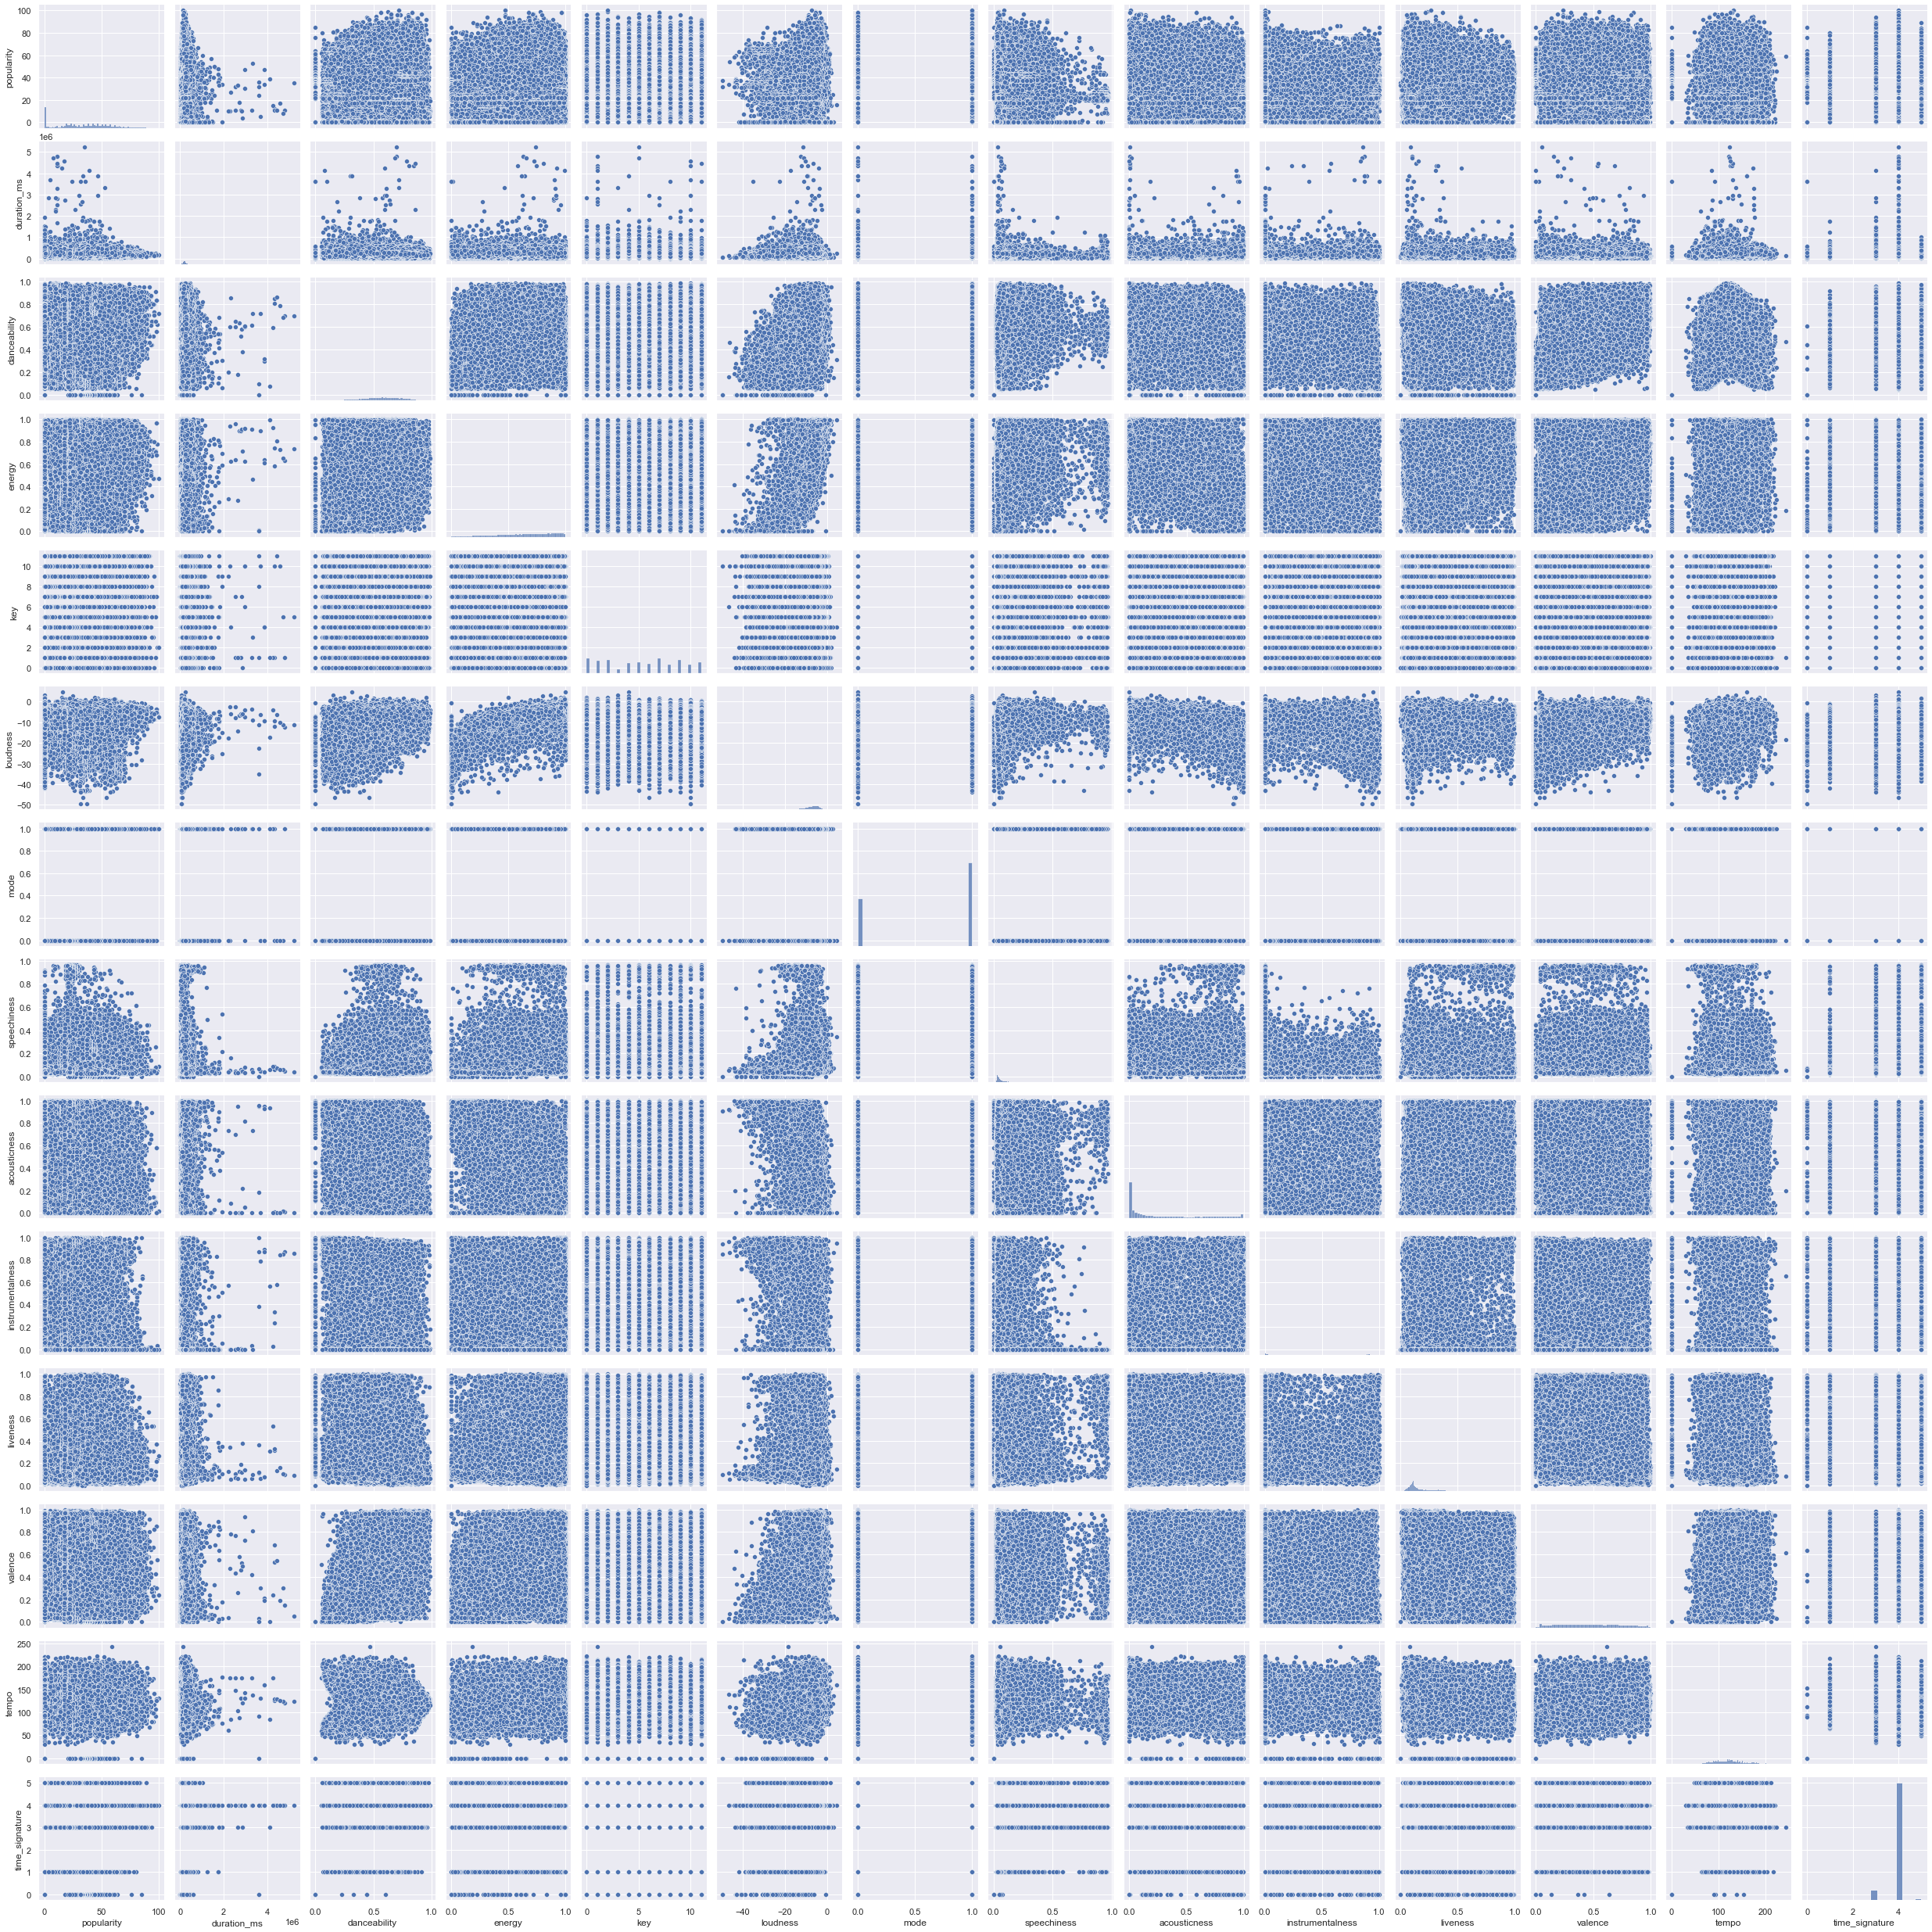

In [12]:
sns.pairplot(df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')],palette = ["#8000ff","#da8829"])

<AxesSubplot:>

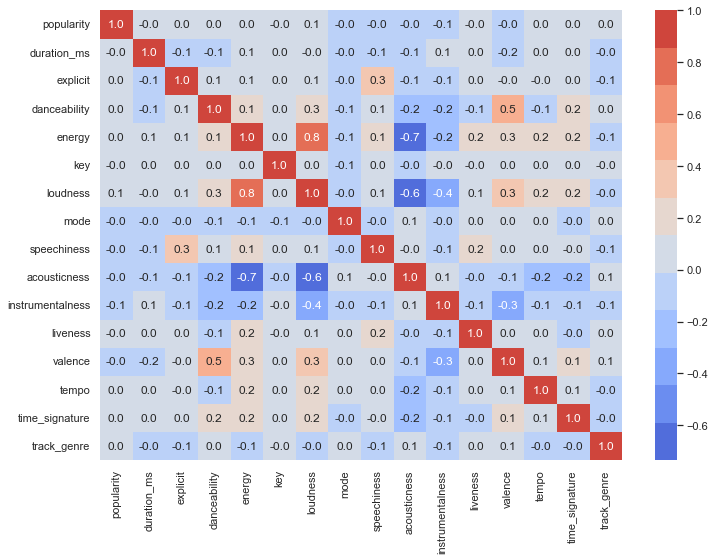

In [13]:
sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap = sns.color_palette("coolwarm", 12))

In [14]:
X = df.loc[:,df.columns != 'popularity'].values
y = df['popularity'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [15]:
XGBreg = XGBRegressor(scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.3,
                      subsample = 0.8,
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=10, 
                      gamma=1)
ridge_model = linear_model.Ridge(alpha=.5)
lasso_model = linear_model.Lasso(alpha =.1)
tr = tree.DecisionTreeRegressor()
bayridge_model = linear_model.BayesianRidge()
lm = linear_model.LinearRegression()
poly_list = [PolynomialFeatures(degree=i, include_bias=False) for i in range(2,4)]
prm_list = [linear_model.LinearRegression() for i in range(2,4)]

In [16]:
def model_metrics(model, X_test, y_test, decimals = 5, X_train = X_train, y_train = y_train):
    start  = datetime.now()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = np.round(mean_squared_error(y_test, y_pred),decimals)
    r2 = np.round(r2_score(y_test, y_pred),decimals)
    return {'mean_squared_error': mse, 'R-Squared': r2, 'time': (datetime.now() - start).seconds}

In [17]:
def poly_model_metrics(models, poly_list, X_test, y_test, decimals = 5, X_train = X_train, y_train = y_train):
    metrics_list = []
    for i in range(len(models)):
        start = datetime.now()
        poly_features = poly_list[i].fit_transform(X_train)
        models[i].fit(poly_features, y_train)
        y_pred = models[i].predict(poly_list[i].fit_transform(X_test))
        mse = np.round(mean_squared_error(y_test, y_pred), decimals)
        r2 = np.round(r2_score(y_test, y_pred), decimals)
        metrics_list.append(
            {'mean_squared_error': mse, 'R-Squared': r2, 'time': (datetime.now() - start).seconds})
    return metrics_list

In [18]:
poly_models = poly_model_metrics(prm_list, poly_list, X_test, y_test)
poly_results = pd.DataFrame(
    [
        {'mean_squared_error': metrics['mean_squared_error'], 'R-Squared': metrics['R-Squared'], 'time': metrics['time']} 
        for metrics in poly_models
    ],
    index = [f'PolynomiyalRegression_{i+2}_degrees' for i in range(len(poly_models))]) \
.reset_index() \
.rename(columns = {'index': 'model'})

In [19]:
results = pd.DataFrame(
    [
        model_metrics(XGBreg, X_test, y_test),
        model_metrics(ridge_model, X_test, y_test),
        model_metrics(lasso_model, X_test, y_test),
        model_metrics(tr, X_test, y_test),
        model_metrics(bayridge_model, X_test, y_test),
        model_metrics(lm, X_test, y_test)
    ], 
    index = ['XGBRegressor', 'Ridge', 'Lasso', 'DecisionTreeRegressor', 'BayesianRidge', 'LinearRegression']) \
.reset_index() \
.rename(columns={'index':'model'})

In [20]:
results = results.append(poly_results)

In [21]:
results.sort_values(['mean_squared_error', 'R-Squared', 'time'],
              ascending = [True, False, True])

model  mean_squared_error  R-Squared  time
0                     XGBRegressor           267.25734    0.46335    43
0  PolynomiyalRegression_2_degrees           462.98610    0.07033     1
3            DecisionTreeRegressor           466.44516    0.06339     1
5                 LinearRegression           484.55812    0.02702     0
1                            Ridge           484.55830    0.02702     0
4                    BayesianRidge           484.56537    0.02700     0
1  PolynomiyalRegression_3_degrees           487.34004    0.02143     7
2                            Lasso           488.06187    0.01998     0

In [22]:
results = results[results['R-Squared'] >= 0]

Text(0.5, 1.0, 'Model Performance based on Mean Squared Error')

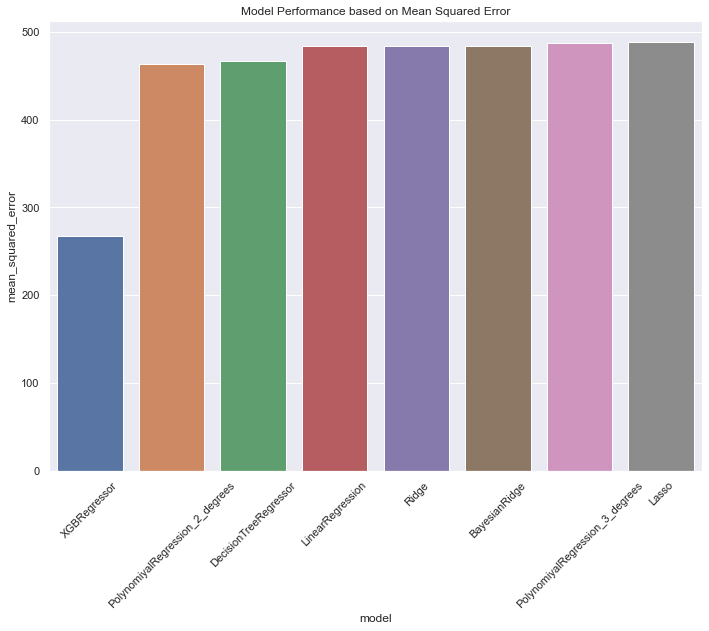

In [23]:
results = results.sort_values('mean_squared_error', ascending = True)
plt.xticks(rotation=45)
sns.barplot(x = results['model'], y=results['mean_squared_error']).set_title('Model Performance based on Mean Squared Error')

Text(0.5, 1.0, 'Model Performance based on R-Squared')

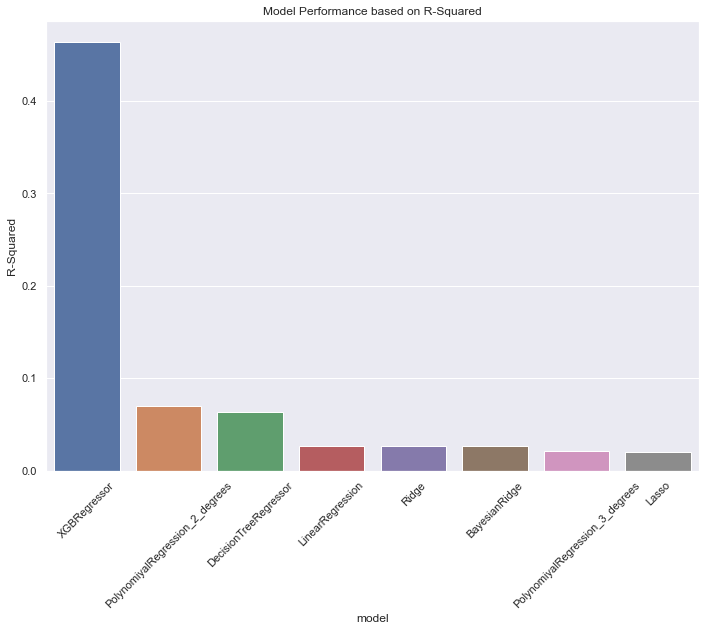

In [24]:
results = results.sort_values('R-Squared', ascending = False)
plt.xticks(rotation=45)
sns.barplot(x = results['model'], y=results['R-Squared']).set_title('Model Performance based on R-Squared')

In [25]:
y_pred = XGBreg.predict(X_test)

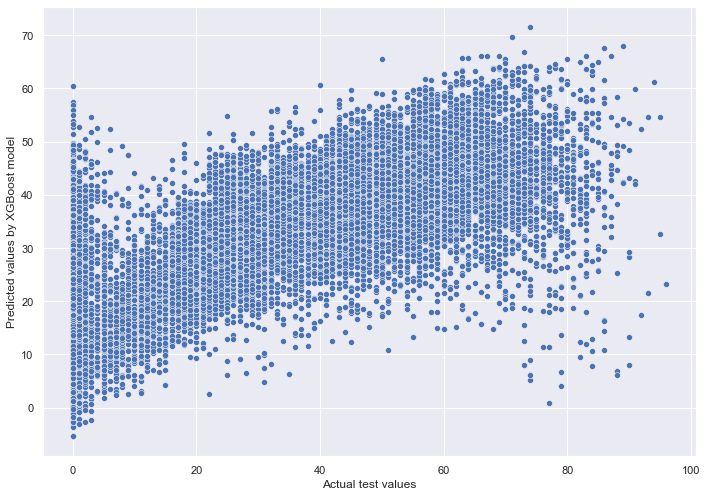

In [26]:
ax = sns.scatterplot(x=y_test, y=y_pred)
ax.set(xlabel='Actual test values', ylabel='Predicted values by XGBoost model')
plt.show()

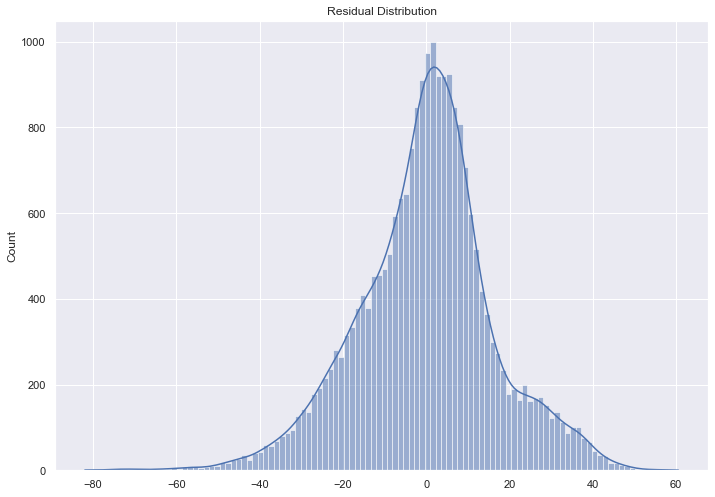

In [27]:
ax = sns.histplot(y_pred - y_test, kde = True)
ax.set(title='Residual Distribution')
plt.show()

In [28]:
xgb_model = XGBreg.fit(X_train, y_train)

In [29]:
xgb_ftr_imp = xgb_model.feature_importances_

In [30]:
feature_importances_df = pd.DataFrame(xgb_ftr_imp, index = df.loc[:,df.columns != 'popularity'].columns) \
.reset_index() \
.rename(columns = {0: 'importance', 'index': 'feature'}) \
.sort_values('importance', ascending = False)

Text(0.5, 1.0, 'Importance of features for predicting Popularity using XGBoost')

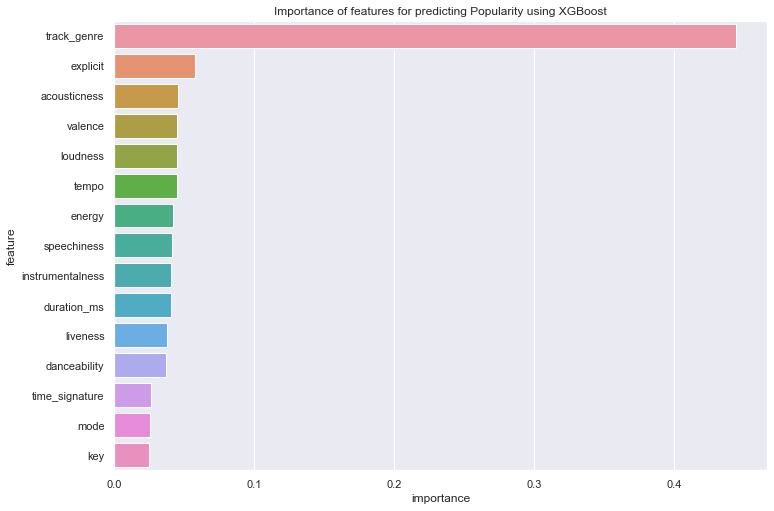

In [31]:
sns.barplot(y=feature_importances_df['feature'], x = feature_importances_df['importance']).set_title('Importance of features for predicting Popularity using XGBoost')